Conducting an A&B test to determing which landing page of a web page is more effective in selling the business. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("done")

done


In [3]:
# Example of loading a CSV file
df = pd.read_csv('web_page_data.csv')

#check the first 10 rows 
df.head(10)


,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67
5,Page B,0.85
6,Page A,2.11
7,Page B,2.46
8,Page A,1.32
9,Page B,1.49


In [7]:
# the time is expressed in 100th of second. so i will convert to seconds. 

# Convert the 'Time' column from 100ths of seconds to seconds
df['Time_in_seconds'] = df['Time'] * 100

df = df.drop(columns=['Time'])

df.head(10)


,Page,Time_in_seconds
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0
5,Page B,85.0
6,Page A,211.0
7,Page B,246.0
8,Page A,132.0
9,Page B,149.0


In [9]:

df['Time_in_seconds'].describe()

count     36.000000
mean     141.194444
std       94.240670
min       21.000000
25%       70.250000
50%      118.000000
75%      199.250000
max      357.000000
Name: Time_in_seconds, dtype: float64

In [11]:
# Group the data by 'Page' and calculate the standard deviation for 'Time_in_seconds'
grouped_std = df.groupby('Page')['Time_in_seconds'].std()

# Display the result
print(grouped_std)


Page
Page A     88.463175
Page B    101.136400
Name: Time_in_seconds, dtype: float64


In [13]:
# Calculate IQR
Q1 = df['Time_in_seconds'].quantile(0.25)
Q3 = df['Time_in_seconds'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = df[(df['Time_in_seconds'] < (Q1 - 1.5 * IQR)) | (df['Time_in_seconds'] > (Q3 + 1.5 * IQR))]

# Count the outliers
outliers.shape[0]


0

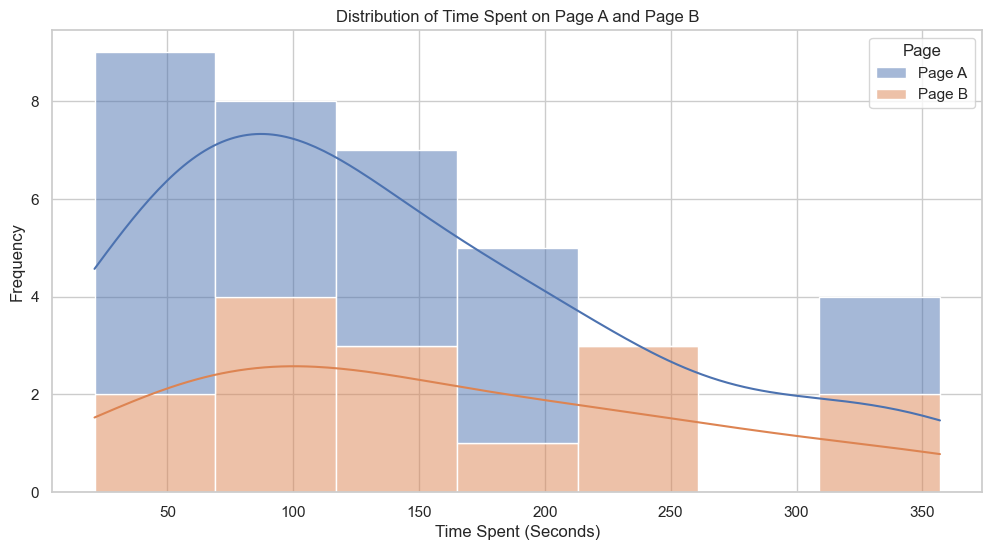

In [15]:
#plotting the distribution of both groups. 

# Set style of the visualization
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Plot the distribution of time spent on both pages
sns.histplot(data=df, x='Time_in_seconds', hue='Page', multiple='stack', kde=True)

# Add labels and title
plt.xlabel('Time Spent (Seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Spent on Page A and Page B')

# Show the plot
plt.show()

In [17]:
# Separate data for Page A and Page B
page_a = df[df['Page'] == 'Page A']['Time_in_seconds']
page_b = df[df['Page'] == 'Page B']['Time_in_seconds']


print(page_a.head(10))


0      21.0
2      35.0
4      67.0
6     211.0
8     132.0
10     68.0
12    321.0
14    147.0
16     95.0
18     45.0
Name: Time_in_seconds, dtype: float64


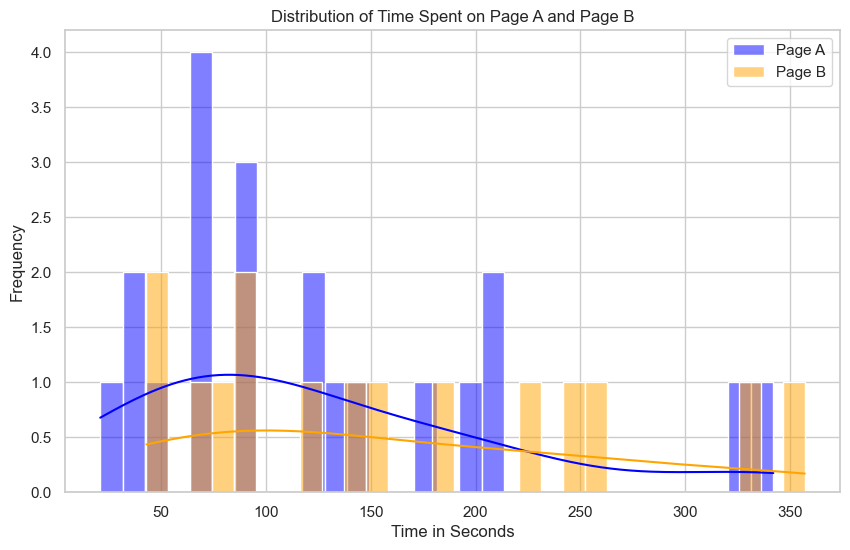

In [21]:
# Set style of the visualization
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Plotting the distribution of Time_in_seconds for Page A and Page B
sns.histplot(page_a, color='blue', label='Page A', kde=True, bins=30)
sns.histplot(page_b, color='orange', label='Page B', kde=True, bins=30)

# Add labels and title
plt.xlabel('Time in Seconds')
plt.ylabel('Frequency')
plt.title('Distribution of Time Spent on Page A and Page B')
plt.legend()
plt.show()


from the histogram above, the KDE(kernerl density estimate)both pages tend to extend towards the 300sec mark but page B has more users spenidng 300+ seconds whcich could suggest that more users are spending more time on page B.

the KDE for page A is higher and more concetrated around the 80-100 secs mark, while page B has a flatter more spreadout Kde, whcih signifies that Page A has a higher concentration of users who finishes faster, while page B has a broader distribution.  

Hence if the goal is to get users through a process quickly then Page eg. more efficient at selling as in our case study, then Page A does the job. 


~~the Null hypothesis : there is no difference between the mean time spent on PageA and PageB
~~~~that is  H₀: μA = μB
Where:
μA = Mean time spent on page A
μB = Mean time spent on page B .

~~if page A is equal to page B then ther is no significance evidence to show that page B is more effective at selling. 

~~the Alternate hypothesis : is that there is a difference between the mean time spent of Page B and PAge A. 

~~that is H₁: μB > μA

In [50]:
#use the Shapiro-Wilk test for normality
print("Shapiro-Wilk Test for Page A:", stats.shapiro(page_a))
print("Shapiro-Wilk Test for Page B:", stats.shapiro(page_b))

Shapiro-Wilk Test for Page A: ShapiroResult(statistic=0.8842321701552288, pvalue=0.01751507607877016)
Shapiro-Wilk Test for Page B: ShapiroResult(statistic=0.9149384800320951, pvalue=0.16119407754094434)


~~~~
~~p-value for Page A is 0.0175 which is less that 0.05, which means it does not follow a normal distribution.
~~P-value for Page B is 0.161 which is greater that 0.05, which means it follows a normal distribution. 
~~hence we would use a non-parametric test such as the Mann_whitney U test which compares the ranks of data rather than the means in a t-test. 

In [62]:
# Performing the Mann-Whitney U test 
u_stat, p_value_mw = stats.mannwhitneyu(page_b, page_a, alternative='greater')

#declaring the significance level 
#sig_level = significance level
sig_level= 0.05

# display of the result
print("Mann-Whitney U statistic:", u_stat)
print("P-value:", p_value_mw)

# result interpretations
if p_value_mw < sig_level:
    print("Reject the null hypothesis: Page B engages users more than Page A.")
else:
    print("Fail to reject the null hypothesis: No evidence that Page B engages users more than Page A.")


Mann-Whitney U statistic: 195.5
P-value: 0.11440454330599648
Fail to reject the null hypothesis: No evidence that Page B engages users more than Page A.


In [64]:
# Performing  a one-tailed independent t-test to understand better 
# Testing if the mean of Page B > mean of Page A
t_stat, p_value_ttest = stats.ttest_ind(page_b, page_a, alternative='greater')

# display results of the t-test 
print("T-test Statistic:", t_stat)
print("T-test P-value:", p_value_ttest)

# result interpretation. 
sig_level = 0.05
if p_value_ttest < sig_level:
    print("Reject the null hypothesis: Page B engages users more than Page A.")
else:
    print("Fail to reject the null hypothesis: No evidence that Page B engages users more than Page A.")


T-test Statistic: 1.1237042154424814
T-test P-value: 0.1345051218196303
Fail to reject the null hypothesis: No evidence that Page B engages users more than Page A.


Both test give the same result, this is streghtnes the ecidence that there is no statistical differrence btweeen page A and Page B 

and this suggest that the result is reliable despite the normality issue. 

I would also like to state that the sample size was small so spotting a difference between the two groups might be difficult, a larger sample size might give a better understandng. 